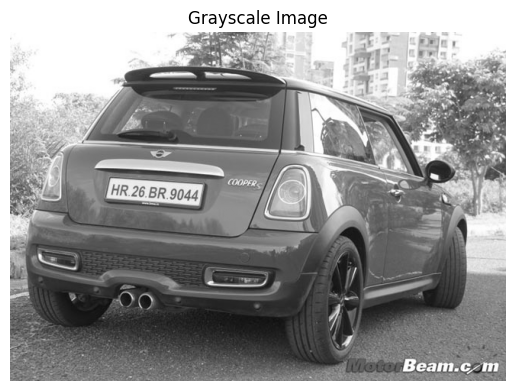

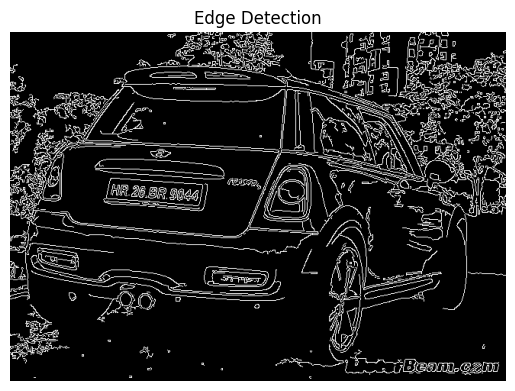

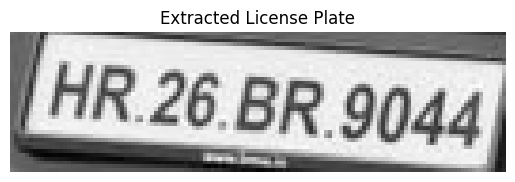

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Recognized License Plate: HR.26 BR.9044


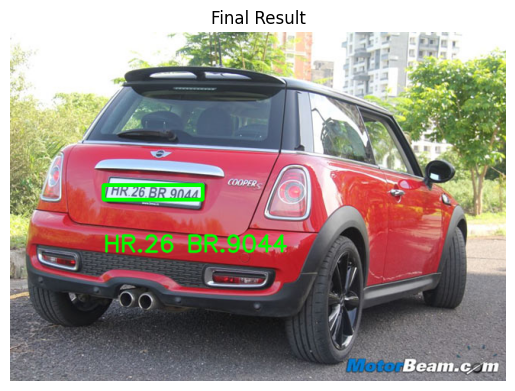

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from easyocr import Reader

def load_and_preprocess_image(image_path):
    """Load and convert image to grayscale"""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray

def display_image(image, title="Image", cmap=None):
    """Display image using matplotlib"""
    if cmap is None:
        if len(image.shape) == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def detect_edges(gray_image):
    """Apply noise reduction and edge detection"""
    # Apply bilateral filter for noise reduction while preserving edges
    bfilter = cv2.bilateralFilter(gray_image, 11, 17, 17)
    
    # Detect edges using Canny edge detector
    edged = cv2.Canny(bfilter, 30, 200)
    return edged

def find_license_plate_contour(edged_image):
    """Find contours and identify potential license plate location"""
    # Find contours in the edged image
    keypoints = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    
    # Sort contours by area (largest first) and keep top 10
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    # Find rectangular contour (potential license plate)
    location = None
    for contour in contours:
        # Approximate the contour to a polygon
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:  # License plate is typically rectangular
            location = approx
            break
    return location

def extract_license_plate(img, gray_img, location):
    """Extract the license plate region from the image"""
    # Create a mask for the license plate
    mask = np.zeros(gray_img.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    # Get coordinates of the license plate
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    
    # Crop the license plate region
    cropped_image = gray_img[topx:bottomx+1, topy:bottomy+1]
    return cropped_image

def recognize_license_plate_text(cropped_image):
    """Use OCR to recognize text from the license plate"""
    # Initialize the OCR reader
    reader = Reader(['en'])
    
    # Perform OCR on the cropped license plate image
    result = reader.readtext(cropped_image)
    
    # Extract the recognized text
    if result:
        return result[0][-2]  # The recognized text
    return None

def annotate_image(img, text, location):
    """Draw bounding box and text on the original image"""
    # Draw rectangle around the license plate
    res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)
    
    # Put the recognized text above the license plate
    res = cv2.putText(img, text=text, 
                     org=(location[0][0][0], location[1][0][1]+60), 
                     fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                     fontScale=1, 
                     color=(0, 255, 0), 
                     thickness=2, 
                     lineType=cv2.LINE_AA)
    return res

def main(image_path):
    """Main function for Automatic License Plate Recognition"""
    # Step 1: Load and preprocess image
    img, gray = load_and_preprocess_image(image_path)
    display_image(gray, "Grayscale Image", 'gray')
    
    # Step 2: Detect edges
    edged = detect_edges(gray)
    display_image(edged, "Edge Detection", 'gray')
    
    # Step 3: Find license plate contour
    location = find_license_plate_contour(edged)
    if location is None:
        print("No license plate found!")
        return
    
    # Step 4: Extract license plate
    cropped_image = extract_license_plate(img, gray, location)
    display_image(cropped_image, "Extracted License Plate", 'gray')
    
    # Step 5: Recognize text
    text = recognize_license_plate_text(cropped_image)
    if text:
        print(f"Recognized License Plate: {text}")
        
        # Step 6: Annotate original image
        result_image = annotate_image(img, text, location)
        display_image(result_image, "Final Result")
    else:
        print("No text recognized from the license plate")

if __name__ == "__main__":
    image_path = 'image1.jpg'  # Replace with your image path
    main(image_path)

----- Automatic License Plate Recognition System -----


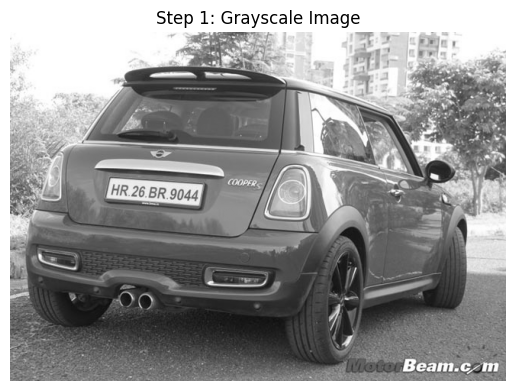

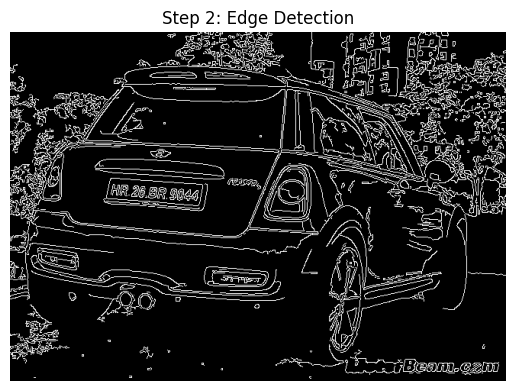

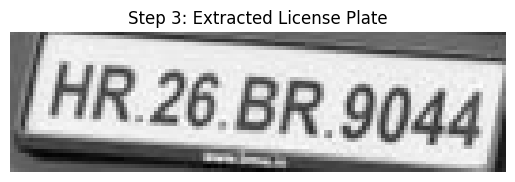

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Recognized License Plate: HR.26 BR.9044


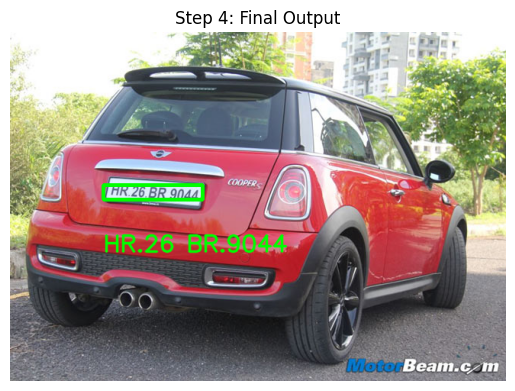

In [6]:
"""
Project Title: Automatic License Plate Recognition System
Author: [Your Name]
Description: This project focuses on extracting meaningful image features 
to detect and recognize license plates using computer vision techniques.
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from easyocr import Reader

# ----------------------- Image Preprocessing and Feature Extraction -----------------------

def load_and_preprocess_image(image_path):
    """Step 1: Load image and convert to grayscale (key feature extraction step)"""
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray

def display_image(image, title="Image", cmap=None):
    """Utility function to display images using matplotlib"""
    if cmap is None:
        if len(image.shape) == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def detect_edges(gray_image):
    """Step 2: Apply noise reduction and detect edges (feature boundaries)"""
    # Bilateral filter preserves edges while reducing noise
    bfilter = cv2.bilateralFilter(gray_image, 11, 17, 17)
    # Canny edge detection highlights object boundaries
    edged = cv2.Canny(bfilter, 30, 200)
    return edged

# ----------------------- Feature-Based License Plate Detection -----------------------

def find_license_plate_contour(edged_image):
    """Step 3: Find rectangular contours representing license plates"""
    keypoints = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:  # A license plate is typically a 4-sided polygon
            location = approx
            break
    return location

def extract_license_plate(img, gray_img, location):
    """Step 4: Extract license plate region using the detected contour"""
    mask = np.zeros(gray_img.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    
    cropped_image = gray_img[topx:bottomx+1, topy:bottomy+1]
    return cropped_image

# ----------------------- OCR Text Recognition and Result Visualization -----------------------

def recognize_license_plate_text(cropped_image):
    """Step 5: Recognize text from the license plate using OCR"""
    reader = Reader(['en'])
    result = reader.readtext(cropped_image)
    
    if result:
        return result[0][-2]
    return None

def annotate_image(img, text, location):
    """Step 6: Annotate detected license plate and recognized text"""
    img = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)
    img = cv2.putText(img, text, 
                      org=(location[0][0][0], location[1][0][1]+60), 
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                      fontScale=1, 
                      color=(0, 255, 0), 
                      thickness=2, 
                      lineType=cv2.LINE_AA)
    return img

# ----------------------- Main Driver Function -----------------------

def main(image_path):
    print("----- Automatic License Plate Recognition System -----")
    
    # Step 1: Load and preprocess image
    img, gray = load_and_preprocess_image(image_path)
    display_image(gray, "Step 1: Grayscale Image", 'gray')
    
    # Step 2: Detect edges
    edged = detect_edges(gray)
    display_image(edged, "Step 2: Edge Detection", 'gray')
    
    # Step 3: Find license plate contour
    location = find_license_plate_contour(edged)
    if location is None:
        print("License plate not found.")
        return
    
    # Step 4: Extract license plate
    cropped_image = extract_license_plate(img, gray, location)
    display_image(cropped_image, "Step 3: Extracted License Plate", 'gray')
    
    # Step 5: OCR text recognition
    text = recognize_license_plate_text(cropped_image)
    if text:
        print(f"Recognized License Plate: {text}")
        
        # Step 6: Annotate and display final result
        result_image = annotate_image(img, text, location)
        display_image(result_image, "Step 4: Final Output")
    else:
        print("No text could be recognized from the license plate.")

if __name__ == "__main__":
    image_path = 'image1.jpg'  # Replace with the actual image path
    main(image_path)
